In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(r"D:\Rohini Personal\Data Analysis\Projects Datasets\Zepto_Inventory\zepto_v2.csv",encoding='ISO-8859-1')

In [34]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discounted_mrp,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,25,16,3,21.0,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,42,16,3,35.0,1000,False,1
2,Fruits & Vegetables,Tender Coconut,51,15,3,43.0,58,False,1
3,Fruits & Vegetables,Coriander Leaves,20,15,3,17.0,100,False,100
4,Fruits & Vegetables,Ladies Finger,14,14,3,12.0,250,False,250


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           3218 non-null   object 
 1   name               3218 non-null   object 
 2   mrp                3218 non-null   int64  
 3   discountPercent    3218 non-null   int64  
 4   availableQuantity  3218 non-null   int64  
 5   discounted_mrp     3218 non-null   float64
 6   weightInGms        3218 non-null   int64  
 7   outOfStock         3218 non-null   bool   
 8   quantity           3218 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 204.4+ KB


In [36]:
df.describe()

,mrp,discountPercent,availableQuantity,discounted_mrp,weightInGms,quantity
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,156.843692,7.689559,3.969546,142.104288,354.395898,214.244251
std,152.272226,9.318708,2.202170,132.372284,563.329956,194.175095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,2.000000,56.000000,100.000000,52.000000
50%,115.000000,6.000000,5.000000,107.000000,200.000000,190.000000
75%,200.000000,10.000000,6.000000,188.000000,400.000000,340.000000
max,2600.000000,51.000000,6.000000,1399.000000,10000.000000,1500.000000


In [37]:
df.isnull().sum()

Category             0
name                 0
mrp                  0
discountPercent      0
availableQuantity    0
discounted_mrp       0
weightInGms          0
outOfStock           0
quantity             0
dtype: int64

In [38]:
df['MRP_100gm'] = (df['mrp']/df['weightInGms'])*100

In [39]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discounted_mrp,weightInGms,outOfStock,quantity,MRP_100gm
0,Fruits & Vegetables,Onion,25,16,3,21.0,1000,False,1,2.500000
1,Fruits & Vegetables,Tomato Hybrid,42,16,3,35.0,1000,False,1,4.200000
2,Fruits & Vegetables,Tender Coconut,51,15,3,43.0,58,False,1,87.931034
3,Fruits & Vegetables,Coriander Leaves,20,15,3,17.0,100,False,100,20.000000
4,Fruits & Vegetables,Ladies Finger,14,14,3,12.0,250,False,250,5.600000


### 

### 1)Univariate Analysis

##### a) MRP - Discount Percent - Common Tiers 

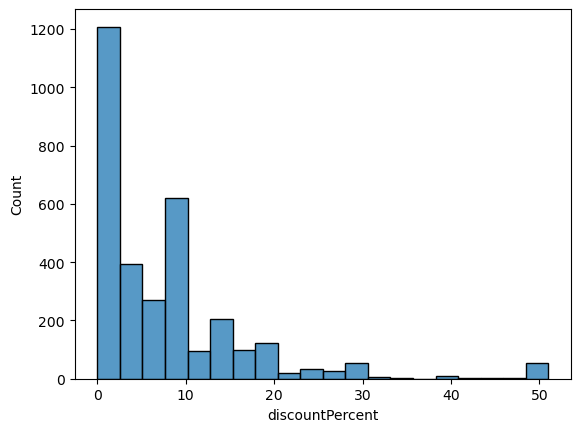

In [40]:
sns.histplot(df['discountPercent'], bins = 20, kde = False)
plt.show()

##### b) Availability Quantity - Stock Skew

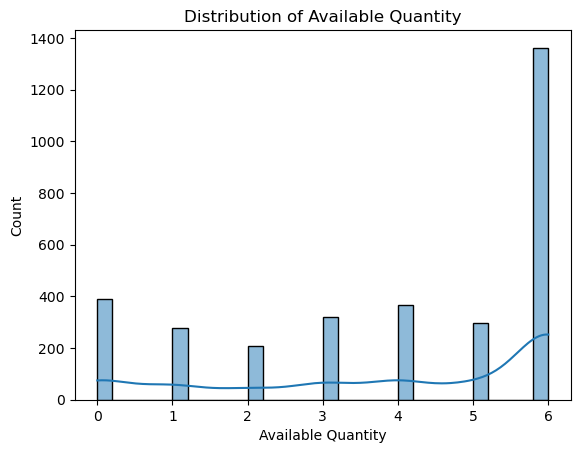

In [41]:
sns.histplot(df['availableQuantity'], bins=30, kde=True)
plt.title('Distribution of Available Quantity')
plt.xlabel('Available Quantity')
plt.show()

##### 3)Top Categories by Product Count

In [42]:
top_categories = df['Category'].value_counts()
top_categories

Category
Munchies                 514
Packaged Food            388
Ice Cream & Desserts     388
Chocolates & Candies     388
Personal Care            344
Paan Corner              344
Home & Cleaning          194
Biscuits                 147
Dairy, Bread & Batter    129
Beverages                129
Health & Hygiene          97
Fruits & Vegetables       93
Meats, Fish & Eggs        63
Name: count, dtype: int64

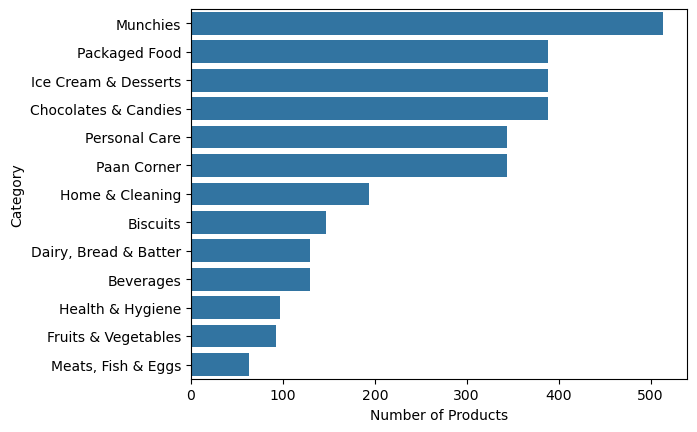

In [43]:
sns.barplot(x = top_categories.values, y = top_categories.index)
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

##### c)Top Purchasing Products

In [44]:
top_products = pd.DataFrame(df['name'].value_counts().head(10))
top_products

,count
name,
Amul Delicious Fat Spread - Cholesterol Free,10
Kellogg's Real Almond & Honey Corn Flakes,9
Arden Eggs White,8
Saffola Veggie Twist Masala Oats,8
Quaker Oats,8
Mother's Recipe Tamarind Paste,8
Sunfeast Yippee! Pasta Treat - Sour Cream Onion,8
Pantai Green Curry Paste,6
Mother's Recipe Pickle - Mango,6


### Product Level Analysis

##### 1)Top 10 Expensive Products

In [47]:
df.sort_values('mrp', ascending = False)[['name','Category','mrp']].head(10)

,name,Category,mrp
159,Borges Extra Light Olive Oil Bottle,Munchies,2600
2502,Pampers Pants - Large,Personal Care,1549
2846,Pampers Pants - Large,Paan Corner,1549
479,Praakritik Natural Desi Gir Cow A2 Ghee,Munchies,1450
217,Dhara Kachi Ghani Mustard Oil Jar,Munchies,1250
513,Saffola Gold (Jar),Munchies,1240
216,Dhara Health Refined Sun Flower Oil Jar,Munchies,1200
2853,Pampers Active Baby Diapers New Born Extra Small,Paan Corner,1099
2826,Pampers Premium Care Pants - Medium,Paan Corner,1099
2482,Pampers Premium Care Pants - Medium,Personal Care,1099


##### 2)Top 10 Products with Highest Discounts(%)

In [49]:
df.sort_values('discountPercent', ascending=False)[['name', 'Category', 'mrp', 'discountPercent']].reset_index().head(10)

,index,name,Category,mrp,discountPercent
0,2105,Dukes Waffy Strawberry Wafers,Biscuits,45,51
1,2101,Dukes Waffy Orange Wafers,Biscuits,45,51
2,2094,Dukes Waffy Chocolate Wafers,Biscuits,45,51
3,1966,Moi Soi Manchurian Sauce - For Stir Fry Marina...,Chocolates & Candies,280,50
4,168,Ceres Foods Nalli Nihari Instant Liquid Masala,Munchies,220,50
5,1129,Moi Soi Black Bean Sauce - Dip Spread Stir Fr...,Packaged Food,280,50
6,1821,Moi Soi Sichuan Chilli Oil- For Stir Fry Marin...,Chocolates & Candies,280,50
7,3122,Epigamia Fruit Yogurt Vanilla,Health & Hygiene,40,50
8,1190,Moi Soi Manchurian Sauce - For Stir Fry Marina...,Packaged Food,280,50
9,1233,Chef's Basket Durum Wheat Penne Pasta,Packaged Food,160,50


##### 3)OutOfStock vs Instocke Products

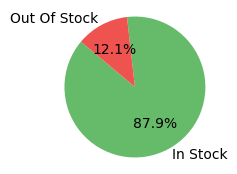

In [59]:
stock_count = df['outOfStock'].value_counts()
stock_labels = ['In Stock', 'Out Of Stock']
plt.figure(figsize = (2,2))
plt.pie(stock_count, labels=stock_labels, autopct='%1.1f%%', colors=['#66bb6a', '#ef5350'], startangle=140)
plt.axis('equal')
plt.show()

### Category-wise Analysis

##### 1)Average MRP by Category

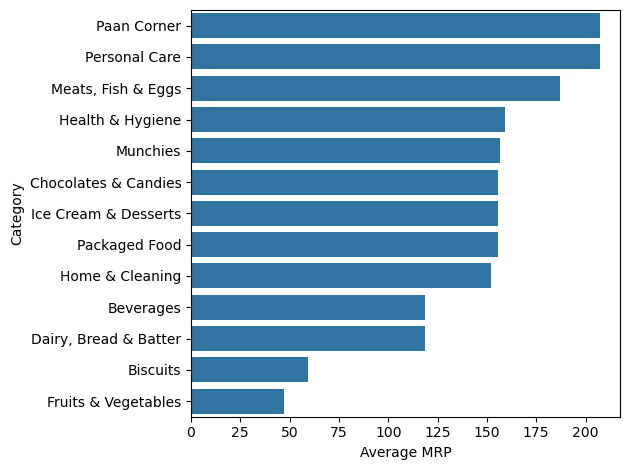

In [80]:
category_mrp = df.groupby('Category')['mrp'].mean().sort_values(ascending=False)

# Plot
sns.barplot(x=category_mrp.values, y=category_mrp.index)
plt.xlabel('Average MRP')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

##### 2)Total Stock by Category

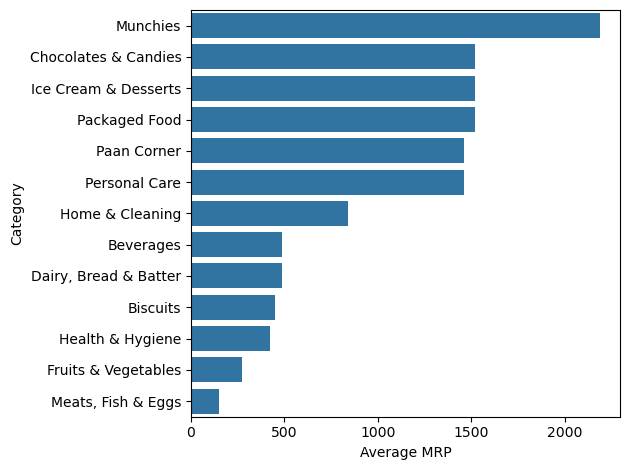

In [81]:
category_Stock = df.groupby('Category')['availableQuantity'].sum().sort_values(ascending=False)

# Plot
sns.barplot(x=category_Stock.values, y=category_Stock.index)
plt.xlabel('Average MRP')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

##### Price Distribution By Category

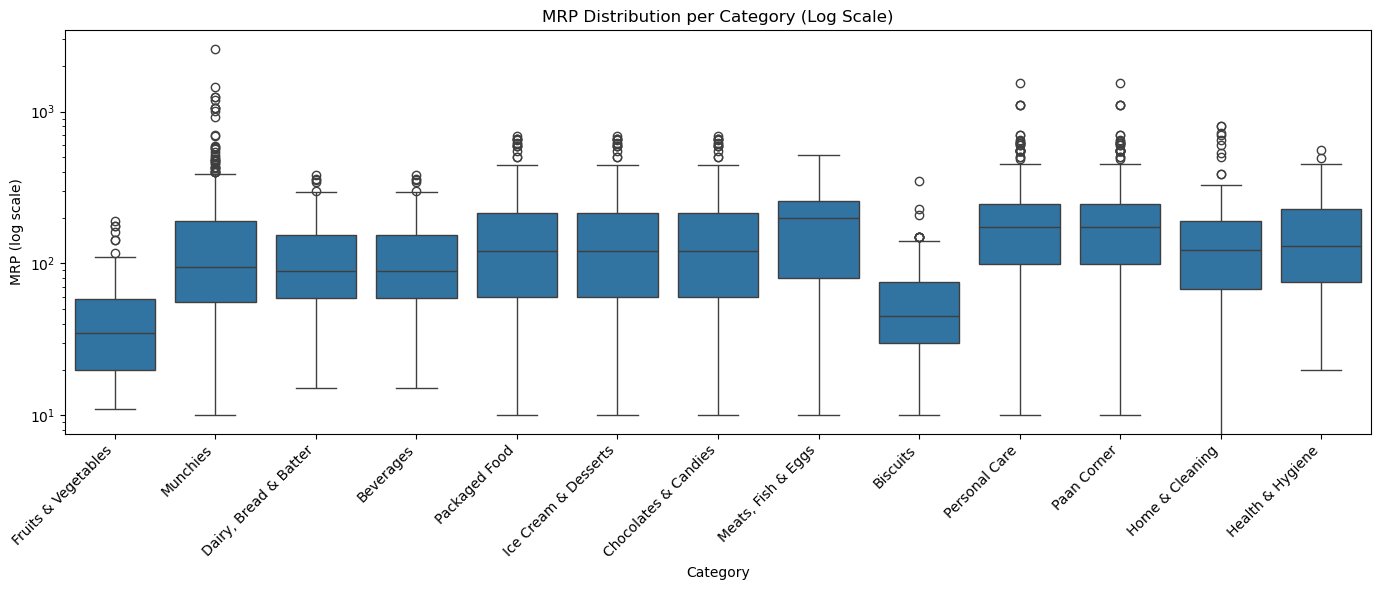

In [88]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Category', y='mrp', data=df)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('MRP Distribution per Category (Log Scale)')
plt.xlabel('Category')
plt.ylabel('MRP (log scale)')
plt.tight_layout()
plt.show()

### Bivariate Analysis

##### 1)MRP vs Discount Percent by Category

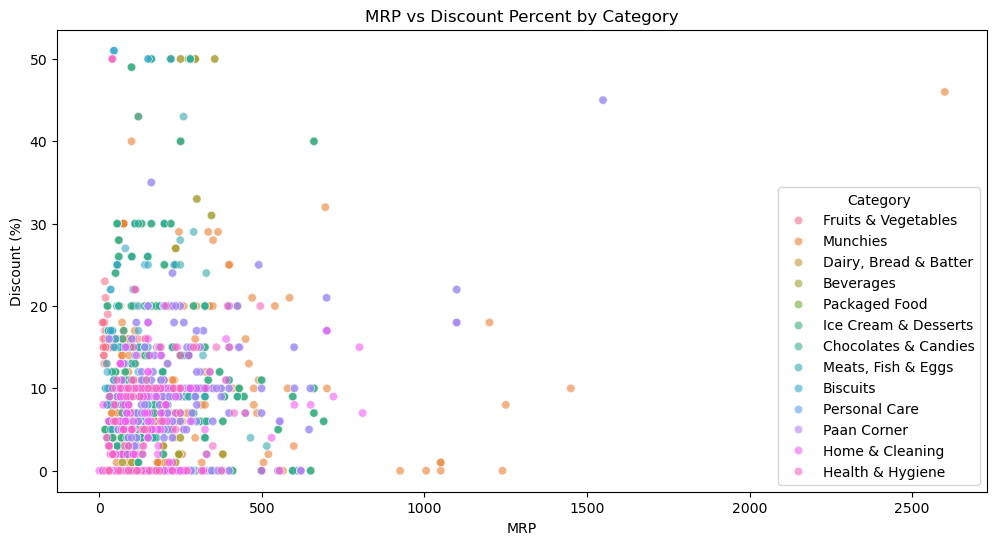

In [90]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='mrp', y='discountPercent', data=df, hue='Category', alpha=0.6)
plt.title('MRP vs Discount Percent by Category')
plt.xlabel('MRP')
plt.ylabel('Discount (%)')
plt.show()

##### 2)Product Weight vs MRP by Category

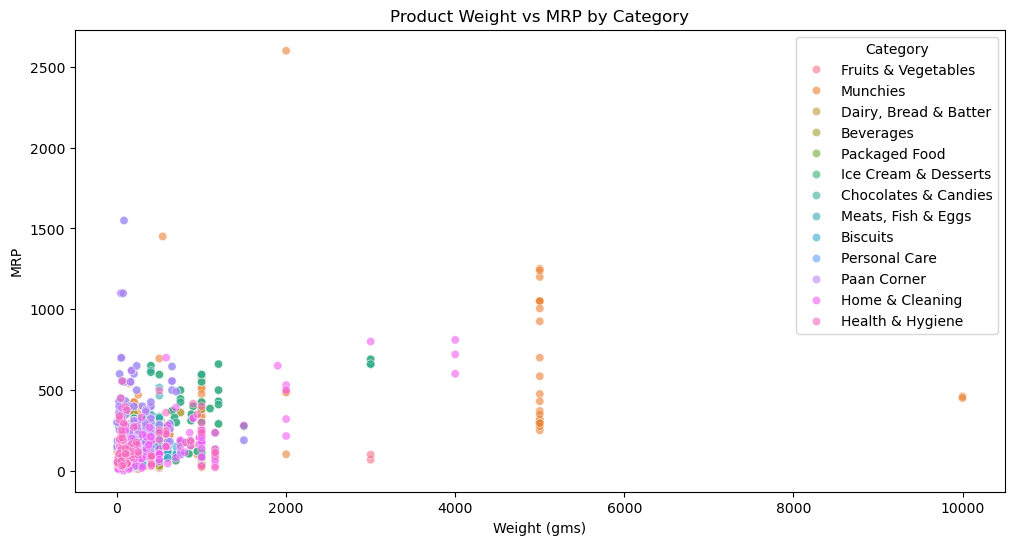

In [92]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='weightInGms', y='mrp', data=df, hue='Category', alpha=0.6)
plt.title('Product Weight vs MRP by Category')
plt.xlabel('Weight (gms)')
plt.ylabel('MRP')
plt.show()

##### 3)Discount vs Available Quantity by Category

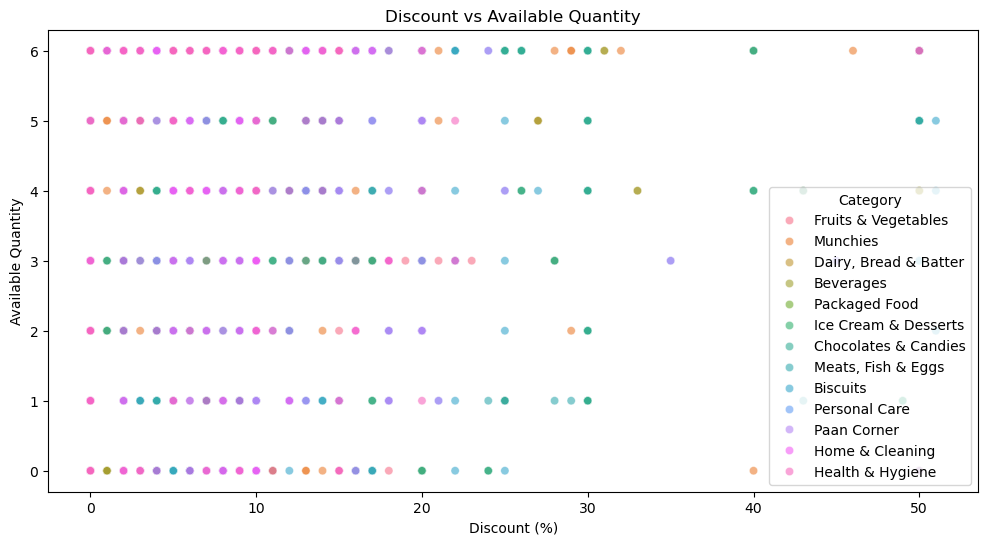

In [94]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='discountPercent', y='availableQuantity', data=df, hue='Category', alpha=0.6)
plt.title('Discount vs Available Quantity')
plt.xlabel('Discount (%)')
plt.ylabel('Available Quantity')
plt.show()